# Data loading

In [170]:
import pandas as pd
from matplotlib import pyplot as plt

In [171]:
df_data = pd.read_csv("./exam_data.csv")
df_data

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,GoodTip,Extra,Cash
0,1,1,2016-02-01 00:01:04,2016-02-01 00:04:14,1,1.50,-73.976166,40.740108,1,N,...,6.0,0.5,0.5,1.00,0.00,0.3,8.30,False,True,False
1,2,2,2016-02-19 20:50:16,2016-02-19 21:11:04,2,3.59,-73.962448,40.763321,1,N,...,15.5,0.5,0.5,0.00,0.00,0.3,16.80,False,True,True
2,3,1,2016-02-19 20:50:37,2016-02-19 21:02:00,1,1.70,-73.991402,40.732143,1,N,...,9.0,0.5,0.5,1.00,0.00,0.3,11.30,False,True,False
3,4,1,2016-02-19 20:51:07,2016-02-19 21:06:48,1,5.90,-74.014999,40.713940,1,N,...,19.5,0.5,0.5,4.15,0.00,0.3,24.95,True,True,False
4,5,2,2016-02-19 20:52:16,2016-02-19 21:03:09,1,2.93,-73.960510,40.761551,1,N,...,11.5,0.5,0.5,2.56,0.00,0.3,15.36,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28449,28450,2,2016-02-28 23:43:47,2016-02-28 23:52:44,1,2.64,-73.983849,40.747086,1,N,...,10.0,0.5,0.5,2.26,0.00,0.3,13.56,True,True,False
28450,28451,2,2016-02-28 23:51:44,2016-02-29 00:06:32,1,8.15,-73.873001,40.774117,1,N,...,24.0,0.5,0.5,6.17,5.54,0.3,37.01,True,True,False
28451,28452,2,2016-02-28 23:57:03,2016-02-29 00:06:35,5,2.46,-73.962769,40.766151,1,N,...,10.0,0.5,0.5,1.00,0.00,0.3,12.30,False,True,False
28452,28453,2,2016-02-28 23:58:00,2016-02-29 00:06:14,1,2.14,-73.999641,40.728298,1,N,...,9.0,0.5,0.5,0.00,0.00,0.3,10.30,False,True,True


In [179]:
df_data.iloc[:, 1:].describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000,28449.000000
mean,1.539492,1.665225,13.361013,-72.775710,40.090860,1.036170,-72.868534,40.143246,1.331189,17.787605,0.330699,0.498055,1.766024,0.288217,0.299863,20.970463
std,0.498447,1.317839,1772.187864,9.340323,5.145453,0.276682,8.973884,4.943774,0.485719,917.825350,0.455729,0.032651,2.530016,1.336380,0.008150,917.967477
min,1.000000,0.000000,0.000000,-74.465233,0.000000,1.000000,-74.465332,0.000000,1.000000,-52.000000,0.000000,-0.500000,0.000000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,0.990000,-73.991821,40.736607,1.000000,-73.991188,40.734573,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,1.630000,-73.981644,40.753094,1.000000,-73.979576,40.754093,1.000000,9.000000,0.000000,0.500000,1.320000,0.000000,0.300000,11.400000
75%,2.000000,2.000000,3.050000,-73.966927,40.767731,1.000000,-73.962227,40.769569,2.000000,14.000000,0.500000,0.500000,2.320000,0.000000,0.300000,17.150000
max,2.000000,6.000000,298914.200000,0.000000,41.109280,5.000000,0.000000,41.109280,4.000000,154810.430000,20.550000,1.160000,135.000000,21.000000,0.300000,154832.140000


# Data cleansing

### Check datatypes

In [180]:
df_data.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
GoodTip                     bool
Extra                       bool
Cash                        bool
dtype: object

### Check for null values

In [173]:
print(df_data.columns[df_data.isna().any()].tolist())

[]


### Remove duplicates

In [174]:
df_data = df_data.drop_duplicates()

### Exclude rows with negative price amounts

In [175]:
df_data = df_data.loc[(df_data.tip_amount >= 0) & (df_data.tip_amount >= 0) & (df_data.extra >= 0)]
df_data.shape

(28449, 23)

# Data exploration

Text(0.5, 0, 'Fare Amount USD')

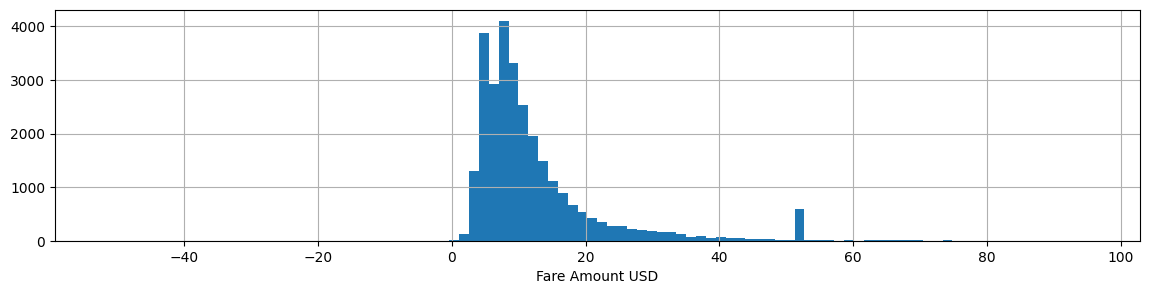

In [209]:
%matplotlib inline

df_data[df_data.fare_amount<100].fare_amount.hist(bins=100, figsize=(14, 3))
plt.xlabel("Fare Amount USD")

From this histogram, we can see that most trips in New York have fare amount of less than $20 USD. To be more precise, 75-th percentile of the fare amount is equal to 14.

In [ ]:
df_data[df_data.total_amount<100].total_amount.hist(bins=100, figsize=(14, 3))
plt.xlabel("Total Amount USD")

From this histogram, we can see that most trips in New York have total price of less than $20 USD. To be more precise, 75-th percentile is equal to 17.15.

Both histograms contain a spike or multiple spikes between 40 and 60 USD. This may indicate some fixed-price routes, such as trips to airports. There are three airports in New York which explains multiple spikes.

## Hypotheses

Our exploration helped us shape the following hypothesis
1. Certain routes have fixed-rate and result in the same total amounts.

We can also state these basic intuitions
1. Total amount correlates with the length of the trip.
2. Total amount depends on the time of day.